Making Necessary Imports

In [3]:
pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/377.0 MB 9.6 MB/s eta 0:00:40
   ---------------------------------------- 1.2/377.0 MB 12.2 MB/s eta 0:00:31
   ---------------------------------------- 1.6/377.0 MB 14.9 MB/s eta 0:00:26
   ---------------------------------------- 2.1/377.0 MB 10.9 MB/s eta 0:00:35
   ---------------------------------------- 2.2/377.0 MB 9.4 MB/s eta 0:00:41
   ---------------------------------------- 2.7/377.0 MB 10.0 MB/s eta 0:00:38
   ---------------------------------------- 2.8/377.0 MB 8.8 MB/s eta 0:00:43
   ---------------------------------------- 3.2/377.0 MB 9.3 MB/s eta 0:00:40
   ---------------------------------------- 3.5/377.0 MB 8.6 MB/s eta 0:00:44
   ---------------------------------------- 3.9/377.0 MB 8.3 MB/s eta 0

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Loading Data

In [8]:
import pathlib
data_dir = pathlib.Path(r"C:\Users\HP\Downloads\archive") #Path of Photos
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)
batch_size = 32
img_height = 224
img_width = 224
data_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
print("Your Training Data : ",  data_train)
data_test = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
class_names = data_train.class_names
print(class_names)

0
Found 404 files belonging to 4 classes.
Using 324 files for training.
Your Training Data :  <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Found 404 files belonging to 4 classes.
Using 80 files for validation.
['angina_disease', 'cardio_vascular_disease_', 'coronary_artery_disease', 'hypotension_disease_']


Performing Data Visualization

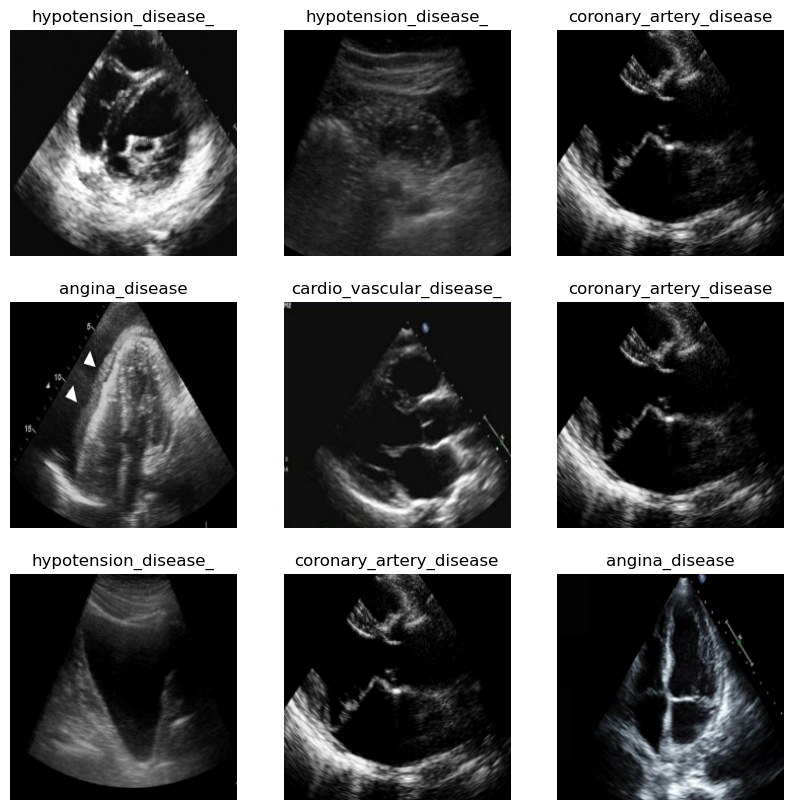

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
num_classes = len(class_names)

Performing Data Augmentation

In [10]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(784,))
x = Dense(10, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)

Preparing Base Model ResNet50 to perform Transfer Learning

In [12]:
base_model = ResNet50(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the ResNet50 layers

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Preparing Model Structure

Training Model

In [14]:
epochs=10
Image_Model = model.fit(data_train,validation_data=data_test,epochs=epochs)
print('Accuracy Status : ',Image_Model.history['accuracy'])

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.3699 - loss: 1.3654 - val_accuracy: 0.5000 - val_loss: 1.1391
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.6657 - loss: 0.8912 - val_accuracy: 0.6500 - val_loss: 0.7854
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.7487 - loss: 0.6894 - val_accuracy: 0.7250 - val_loss: 0.6318
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.7836 - loss: 0.6676 - val_accuracy: 0.6625 - val_loss: 0.7662
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.7452 - loss: 0.6169 - val_accuracy: 0.7250 - val_loss: 0.5825
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.8059 - loss: 0.5690 - val_accuracy: 0.7625 - val_loss: 0.6116
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.8143 - loss: 0.5127 - val_accuracy: 0.7250 - val_loss: 0.5582
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.7981 - loss: 0.5847 - val_accuracy: 0.

Model Evaluation and Analysis

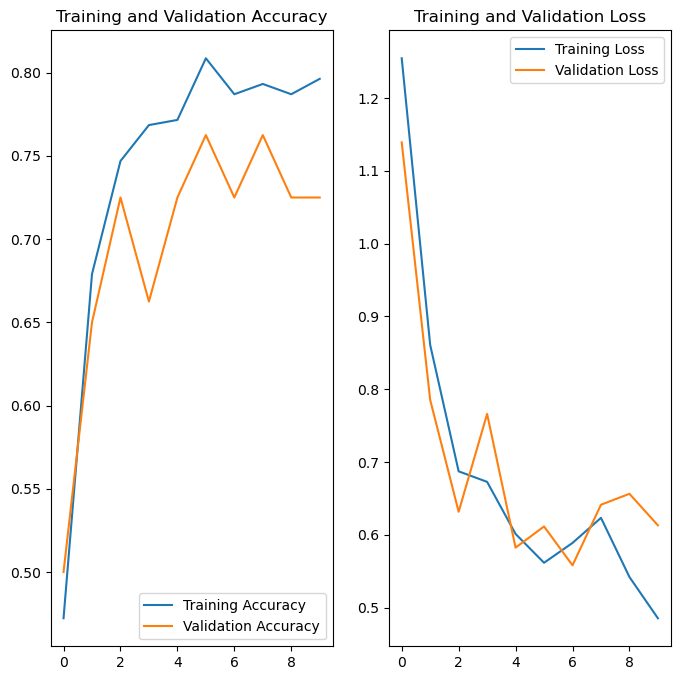

In [15]:
acc = Image_Model.history['accuracy']
val_acc = Image_Model.history['val_accuracy']
loss = Image_Model.history['loss']
val_loss = Image_Model.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Performing Model Testing

In [17]:
img = tf.keras.utils.load_img(r"C:\Users\HP\Downloads\archive\hypotension_disease_\hypotension_disease_\hypotension (6).jpe", target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
result = model.predict(img_array)
print(result)
print(f"This is image of {class_names[np.argmax(result)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[ 6.1554227 -4.5931616 -2.368971   1.8897249]]
This is image of angina_disease
